# 트랜스포머로 만드는 대화형 챗봇

## 15-1. 들어가며
### 대화형 챗봇이란?
챗봇의 5가지 유형
1. 대화형 챗봇
    * 자연어처리(인공지능)를 기반으로 자연스러운 대화가능
    * 질문을 분석하여 답변을 주는 프로세스
    * 엄청난 비정형 데이터 확보 필요, 구축난이도가 높고, 시간이 많이 필요.
    * 결론: 비용(매우 높음), 전문성(매우 높음), 시간(매우 높음)
2. 트리형 챗봇
    * 정해진 트리구조를 따라 답변을 얻는 형태
    * 최종답변의 경우의 수가 정해져 있음
    * 챗봇 1세대에 주로 쓴 방식이며 고객 피드백에 따라 경우의 수 추가
    * 결론: 비용(매우 낮음), 전문성(낮음), 시간(보통)
3. 추천형 챗봇
    * 표면적으로는 대화지만, 답변 제공방식이 대화형과 다르다.
    * 인공지능 기반일 수도 있고, 아닐 수도 있다.
    * 사전에 정의된 답변 리스트를 알고리즘 우선순위에 따라 보여준다.(리스트로도 보여줄 수 있다)
    * 리스트가 1면 대화형과 다를게 없지만, 추천 답변을 리스트로 보여주면 고객이 선택을 해야 하지만, 원하는 답변을 얻을 확률이 높다.
    * 대화형 챗봇으로 가기 위한 중간과정
    * 결론: 비용(보통), 전문성(보통), 시간(많음)
4. 시나리오형 챗봇
    * 원하는 서비스나 아웃풋을 제공하기 위해 정해진 시나리오 수행.(로그인 과정, 아이디->유효성->비번->유효성)
    * 최종결과를 출력하기 위해서 고객에게 받아야할 인풋을 순서대로 받아낸다.
    * 제공해야 할 결과물이 정해져 있을 때 사용하며 투자대비 가장 효과가 좋다고 알려짐
    * 결론: 비용(보통), 전문성(보통), 시간(보통)
5. 결합형 챗봇
    * 위의 챗봇을 결합하여 설계.
    * 고객이 챗봇에서 모든 서비스를 완료하는 것이 최종 목적

### 챗봇과 딥러닝  
앨런 듀닝의 인공지능 정의가 챗봇의 시발점이라고 불리운다.  
2011년 애플의 시리를 시작으로 챗봇의 가능성에 대해 많은 사람들이 관심을 갖게 되고 대기업에서 여러가지 챗봇을 개발.  
챗봇이 실제로는 자신들이 말하는 것조차 해석하지 못함을 깨닫고 사람들의 관심에서 멀어짐.  
2017년에 개선된 모델을 통해 챗봇의 성능이 많이 향상.
좋은 성능을 발휘하는 BERT, ALBERT 모두 transformer를 통해 pretrain을 적용.  
이전의 LSTM(RNN), seq2seq에 비해서 병렬처리 속도가 뛰어나고, 장기의존성에 강한 특징으로 긴 길이의 문장처리에도 좋은 모습을 보여줬다.  
따라서 transformer 기반으로 인코더-디코더 구조의 챗봇을 만들것.  
ex)영어->한국어 번역(영어문장을 인코더가 벡터로, 이 벡터를 디코더가 한국문장으로)  
좋은 성능을 내기 위해서는 pretrained model을 활용할 필요가 있으나 우리는 구조만 알아보는 정도에 그친다.  

### 학습목표
----------------------------------------------------------------------------------------------------------
1. 트랜스포머의 인코더 디코더 구조 이해하기
2. 내부 단어 토크나이저 사용하기
3. 셀프 어텐션 이해하기
4. 한국어에도 적용해보기  

### 준비물
-----------------------------------------------------------------------------------------------------------
```
$ mkdir -p ~/aiffel/songys_chatbot  
```


## 15-2. 트랜스포머와 인코더 
### 인코더와 디코더 구조 되짚어보기
-----------------------------------------------------------------------------------------------------------
인코더에 입력문장이 들어가고, 디코더에서 이에 대응하는 출력문장 생성.  
이를 훈련한다는 것은 (입력문장, 출력문장) 병렬구조로 구성된 데이터셋을 훈련  
이런 방식은 번역기뿐 만 아니라 질문에 대한 답변에도 사용한다.

### 트랜스포머의 인코더와 디코더
-----------------------------------------------------------------------------------------------------------
    트랜스포머도 번역기와 같이 인코더, 디코더로 구성.  
입력 문장의 정보를 누적되어 있는 인코더에서, 출력문장의 단어를 누적되어 있는 디코더를 통해서 하나씩 만들어 나간다.
<img src="인코더,디코더.png" align="left">
<img src="transformer.png" align= "left">

## 15-3. 트랜스포머의 입력 이해하기

```
conda install -c powerai tensorflow-datasets
```

In [1]:
#패키지 임포트
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


많은 자연어 처리 모델은 단어를 임베딩 벡터로 변환.  
트랜스포머와 다른 RNN모델과 다른 것은 임베딩벡터에 어떤 값을 더해서 입력으로 사용.  
그 값이 포지셔널 인코딩(positional Encoding)  

<img src="positional_encoding.png" align="left">
<img src="positional_encoding1.png" align="left">  
  

RNN은 어순대로 모델에 입력되어 어순정보를 따로 줄 필요가 없었으나,  
트랜스포머는 한꺼번에 문장의 모든 단어를 문장단위로 입력받기에 어순정보를 따로 넣어줘야 한다.  
그래서 위치정보를 가진 벡터를 더해서 모델에 입력한다.  
<img src="positional_expression.png" align="left">  
  
  


위의 함수에서 pos, i, dmodeli는 아래 그림에서 확인할 수 있다.  
dmodeli는 임베딩 벡터의 차원을 의미.  
pos는 입력 문장에서의 임베딩 벡터의 위치를 나타내며 i는 임베팅 벡터내의 차원 인덱스의미.  

<img src="positional_variable.png" align="left">

In [2]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]
print("슝=3")

슝=3


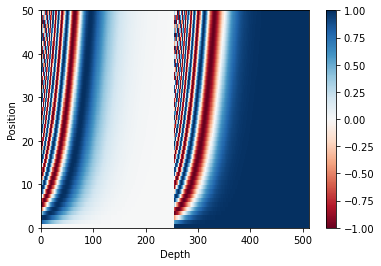

In [3]:
#행(문장)의 크기가 50, 열(워드 임베딩 차원)의 크기가 512인 행령.
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## 15.4 어텐션? 어텐션!
### 어텐션이란?
-----------------------------------------------------------------------------------------------------------
그림 상으로 딕셔너리 구조인 것으로 보인다.  
주어진 쿼리(query)와 각 키(key)의 유사도를 각 값(value)에 맵핑.  
이 값들을 모두 더한 것을 어텐션 값이라고 한다.  
<img src="attention.png" align="left">  

### 트랜스포머에서 사용된 어텐션  
-----------------------------------------------------------------------------------------------------------
트랜스포머는 3가지 어텐션 사용.  
1. 인코더 셀프 어텐션(인코더)
2. 디코더 셀프 어텐션(디코더)
3. 인코더-디코더 어텐션(디코더)  

<img src="transformer_attention.png" align="left">

어텐션에서 사용되는 쿼리(Query), 키(Key), 밸류(Value)는 기본적으로 단어 (정보를 함축한) 벡터

주의할 점은 단어 벡터는 초기 입력으로 사용되었던 임베딩 벡터가 아니고, **트랜스포머의 여러 연산을 거친 후의 단어 벡터**

각 어텐션의 기능.  

인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구한다.  
디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구한다.  
인코더-디코더 어텐션 : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구한다.

3개중 2가지가 셀프 어텐션인데, 셀프 어텐션이 왜 2개나 들어가는지를 알아보자.

### 셀프 어텐션(Self Attention)
----------------------------------------------------------------------------------------------------------
셀프 어텐션은 유사도를 측정하는 대상이 다른 문장의 단어가 아니라 현재 문장 내의 단어들끼리 서로 유사도를 구하는 방식.  
인코더-디코더 어텐션은 서로 다른 단어에서 유사도를 구한다.
셀프 어텐션이 사용된 예시  
한 문장에 animal과 it이 같이 있으면 셀프 어텐션을 통해서 it이 동물임을 알 수 있다.

## 15-5. 스케일드 닷 프로덕트 어텐션  
어텐션을 구하는 수식은 아래와 같다.  
<img src="scaled_dot_production.png">  
  
Q, K, V는 쿼리(Query), 키(Key), 값(Value)를 나타냄.  
어텐션 함수는 주어진 쿼리에 대해서 모든 키와의 유사도를 구한다.  
구한 유사도를 키와 맵핑된 값에 반영.  
유사도가 반영된 값을 모두 더하면 어텐션값이라고 한다.

  1. Q, K, V는 단어 벡터를 행으로 하는 문장행렬.  
  2. 벡터의 내적(dot product)는 벡터의 유사도를 의미.
  3. 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링을 위함.  

문장행렬Q와 문장행렬K의 곱하면 다음의 초록색 행렬과 같다.
<img src="QKV.png">  
예시로 'I'행과 'Student'열의 값은 Q의 'I' 벡터와 K의 'Student' 벡터의 내적값 의미.  
모든 단어 벡터의 유사도가 기록됨.  
유사도행렬을 스케일링해주기 위해서 특정값으로 나누고, 유사도를 0~1로 Normalize해주기 위해서 소프트맥스 함수 사용.  
여기서 문장행렬 V와 곱하면 Attention 값을 얻습니다.
<img src="AttentionValue.png">  
내적을 통해 단어 벡터간 유사도를 구하고 특정값을 분모로 나눠줘서 스케일드 닷 프로덕트 어텐션이라고 칭함.  
특정값으로 안 나눠주면 닷 프로덱트 어텐션이라고 부른다.  

### 구현하기
----------------------------------------------------------------------------------------------------------
스케일드 닷 프로덕트 어텐션 함수를 구현해봅시다

In [4]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  """어텐션 가중치를 계산. """
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # scale matmul_qk
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # add the mask to zero out padding tokens
  if mask is not None:
    logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  output = tf.matmul(attention_weights, value)

  return output
print("슝=3")

슝=3


## 15-6. 머리가 여러 개인 어텐션  
히드라처럼 하나의 일에 여러개가 투입되면 좀더 좋지 않을까 싶다.

### 병렬로 어텐션 수행하기
-----------------------------------------------------------------------------------------------------------
트랜스포머의 num_heads가 몇개의 어텐션연산을 병렬적으로 할지 결정하는 파라미터.  
<img src="num_heads.png">  
포지셔널 인코딩에서 d_model이 임베딩벡터의 차원.  
트랜스포머의 초기 입력인 문장행렬의 크기는 문장길이(행)X d_model(열)  
트랜스포머는 이렇게 입력된 문장행렬을 num_heads으로 나눠 어텐션 수행.  
다시 num_heads갯수만큼 어텐션값 행렬을 concatenate.  

### 멀티-헤드 어텐션  
-----------------------------------------------------------------------------------------------------------
병렬 어텐션수행시 얻을 수 있는 효과는?  
<img src="num_heads_attention.png">  
여러개의 머리가 각각 다른 관점으로 어텐션을 수행해 하나이면 놓칠 정보를 얻을 수 있다.  
어텐션 병렬 수행을 멀티 헤드 어텐션이라고 한다.  

### 구현하기
-----------------------------------------------------------------------------------------------------------
내부적으로 스케일드 닷 프로덕트 어텐션 함수 호출.


In [5]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다.
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다.
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3


## 15-7.마스킹
특정값들을 가려서 실제 연산에 방해되지 않도록 하는 기법을 마스킹이라고 한다.  
트랜스포머에서는 어텐션을 위해 2가지 마스킹 사용.  

### 패딩 마스킹(Padding Masking)
-----------------------------------------------------------------------------------------------------------
자연어 처리의 패딩은 무엇일까?
<img src="padding.png">  
문장의 길이가 다를때 정해진 길이보다 짧은 문장에 0을 넣어 길이를 맞추는 것. (앞에 넣는 것과 뒤에 넣는 것이 있는데, 앞에 넣는 것이 좋았던 것으로 기억한다)  
keras의 pad_sequences()사용.  
숫자 0은 의미가 없기에 숫자가 0인 위치를 따로 체크.  

In [6]:
#정수 시퀀스를 입려갛면 숫자가 0인 부분을 체크한 벡터 리턴
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


In [7]:
# 숫자가 0인 부분은 1이 나온다.
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


### 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)
-----------------------------------------------------------------------------------------------------------
RNN은 step이 있어서 단어가 순서대로 들어가지만 트랜스포머는 문장행렬로 한꺼번에 넣어서 마스킹이 필요.  
<img src="RNN.png">  
RNN은 자신보다 앞에 있는 단어들만 참고해서 다음 단어 예측  
  
트랜스포머는 문장행렬을 입력하기에 위치와 상관없이 모든 단어를 참고해 다음단어 예측.  
우리가 원하는 목표는 이전단어에서 다음 단어를 예측하는 것이기 때문에 자신보다 다음에 나오는 단어를 참고하면 훈련을 제대로 하는 것이 아니다. 자신보다 다음단어를 참고하지 않도록 가리는 기법이 룩 어헤드 마스킹 기법.  
<img src="look_ahead_masking.png">  
빨간색이 마스킹을 표현.  
행이 Query, 열이 Key임을 보고 살펴보자.  
Query 단어가 '행복을'이면 그 행에서는 '찾고'부터 유사도를 구할 수 없게 해놨다.  
빨간색 부분을 마스킹함수로 구현

In [8]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


In [9]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


이 마스킹과 패딩마스킹은 별개이므로 이 마스킹 수행때 0인 단어가 있으면 이것도 패딩해야 해서 create_look_ahead_mask()에서 패딩마스크 함수도 호출

In [10]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


## 15-8. 인코더
트랜스포머의 인코더에 대해 알아보자.  

### 인코더 층 만들기
-----------------------------------------------------------------------------------------------------------
<img src="encoder.png">  
인코더는 2개의 서브 층(sublayer)로 나뉘는데, 셀프 어텐션(멀티 헤드 어텐션)과 피드포워드 신경망이다.
<img src="encoder_1.png">

In [11]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

	# 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


### 인코더 층을 쌓아 인코더 만들기
-----------------------------------------------------------------------------------------------------------
구현한 인코더 층을 임베딩 층(Embedding layer)와 포지셔널 인코딩(Positional Encoding)을 연결하고 원하는 만큼 인코더 층을 쌓아 트랜스포머의 인코더 완성  
인코더, 디코더 내부에서 각 서브층 후에 훈련을 돕는 Layer Normalization을 사용.(위 그림에서 Normalize라 표현)  
트랜스포머는 num_layers(하이퍼 파라미터)의 인코딩 층을 쌓는다. 실습에서는 논문보다 적게 쌓는다.

In [12]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

	# 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


## 15-9. 디코더
인코더와 비슷하지만 좀더 복잠.  
3개의 서브층으로 구성.  
<img src="decoder.png">  
순서대로 셀프 어텐션, **인코더-디코더 어텐션(인코더에서 추가된 것)**, 피드 포워드 신경망.  
인코더-디코더 어텐션은 셀프 어텐션과 달리, Query가 디코더의 벡터, Key, Value가 인코더의 벡터라는 특징.  
인코더가 입력문장의 정보를 디코더에게 전달하는 과정.  
<img src="decoder_1.png">  
셀프 어텐션, 인코더-디코더 어텐션은 모두 스케일드 닷 프로덕트 어텐션을 멀티 헤드 어텐션으로 병렬적으로 수행

In [13]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


### 디코더 층을 쌓아 디코더 만들기
-----------------------------------------------------------------------------------------------------------
디코더의 층은 임베딩 층(Embedding layer)과 포지셔널 인코딩(Positional Encoding)을 연결.  
원하는 만큼(num_layers) 디코더를 쌍하 디코더 완성.  
디코더도 논문보다 적게 쌓아 실습함.  

In [14]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

	# 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
	# 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

	# 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

	# Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


인코더, 디코더를 구현했으니 트랜스포머 모델을 만들 수 있으나, 데이터 로드/전처리를 하자

## 15-10. 챗봇의 병렬 데이터 받아오기
우리가 쓰는 데이터는 Cornell Movie-Dialogs Corpus라는 영화, TV프로그램에서 사용한 대화의 쌍으로 구성된 데이터셋.  
대화의 쌍은 먼저 나온 문장에 응답하는 대화문장의 쌍을 지칭.  

이번 스텝의 목표  
  1. 정해진 개수인 50,000개의 질문과 답변의 쌍을 추출한다.
  2. 문장에서 단어와 구두점 사이에 공백을 추가한다.
  3. 알파벳과 ! ? , . 이 4개의 구두점을 제외하고 다른 특수문자는 모두 제거한다.  


In [15]:
#데이터 다운로드
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
print("슝=3")

슝=3


In [16]:
# 데이터양이 많으니 일부분만 사용.
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


In [17]:
# 전처리 함수 정규표현식을 통해 구두점 제거, 토크나이징에 문제가 없도록 한다!  
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()

  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("슝=3")

슝=3


In [18]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수, 전처리 함수를 안에서 호출
def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
			# 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("슝=3")

슝=3


In [19]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
# 문답이기에 1대1대응. 데이터수가 동일 해야 한다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 50000
전체 샘플 수 : 50000


In [20]:
# 출력해서 제대로 저장되었는지, 전처리가 잘 되었는지 보자.
# 구두점을 기점으로 공백추가.
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: she s not a . . .
전처리 후의 22번째 답변 샘플: lesbian ? no . i found a picture of jared leto in one of her drawers , so i m pretty sure she s not harboring same sex tendencies .


## 15-11. 병렬 데이터 전처리하기

목차
  1. TensorFlow Datasets SubwordTextEncoder를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩한다.
  2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.
  3. 최대 길이 MAX_LENGTH인 40을 넘는 문장들은 필터링한다.
  4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩한다.  

### 1. 단어장(Vocabulary) 만들기
-----------------------------------------------------------------------------------------------------------각 단어에 고유한 정수 인덱스를 부여하기 위해 단어장만듬.
질문,답변 둘다 단어장에 넣는다.

In [21]:
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성. (Tensorflow 2.2.0 이하)
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

# (주의) Tensorflow 2.3.0 이상의 버전에서는 아래 주석의 코드를 대신 실행해 주세요. 
#tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


디코더 생성 과정에서 사용할 시작, 종료 토큰도 단어장에서 추가하여 정수부여.

In [22]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [23]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8331]
END_TOKEN의 번호 : [8332]


In [24]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8333


### 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)
-----------------------------------------------------------------------------------------------------------
tensorflow_datasets의 SubwordTextEncoder를 통해 tokenizer 정의, Vocabulary 완성.  
tokenizer.encode(): 단어 -> 정수  
tokenizer.decode(): 정수 시퀀스 -> 단어 시퀀스.

In [25]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [60, 8, 37, 8172, 49]
정수 인코딩 후의 21번째 답변 샘플: [7824, 1223, 19, 61, 2, 4, 336, 10, 1595, 14, 1104, 698, 3263, 263, 16, 71, 14, 107, 2133, 900, 3, 59, 4, 23, 355, 204, 60, 8, 37, 885, 2289, 8107, 344, 1001, 5179, 4214, 342, 1]


문장 최대 길이를 40으로 정하고 40보다 짧은 것들은 패딩

In [26]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [27]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


길이가 40이 넘는 경우는 제외되었으므로 다시 단어장 크기와 샘플 개수 확인해보자

In [28]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8333
필터링 후의 질문 샘플 개수: 44095
필터링 후의 답변 샘플 개수: 44095


### 3. 교사 강요(Teacher Forcing) 사용하기
-----------------------------------------------------------------------------------------------------------
tf.data.Dataset API는 훈련 프로세스가 빨라지도록 입력파이프라인 구축 API.  
이를 활용하기 위해서는 질문, 답변 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업 필요.  
디코더의 입력과 실제값(레이블)을 정의하기 위해서 교사강요 기법 이해 필요.  

교사 강요(teacher forcing)란, 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법입니다. 

교사 강요를 사용하지 않을때 훈련속도가 지나치게 느려지는 경우가 있다.  
그 이유는 교사 강요를 하지 않은 경우, 잘못된 예측이 다음 시점(time step)의 입력으로 들어가면서 연쇄적으로 예측 정확도에 영향을 미치기 때문
이전의 자신 출력이 현재 자기 상태를 결정하는 모델이 자기회귀모델(auto-regressive, AR).  
RNN모델, 트랜스포머의 디코더가 자기회귀모델.  
질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 사용해 파이프라인 구성.  
교사강요를 위해 answers[:, :-1]를 디코더의 입력값, answers[:, 1:]을 디코더의 레이블로 사용.

In [29]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


## 15-12. 모델 정의 및 학습하기  
앞에서 만든 인코더와 디코더를 이용해 트랜스포머 함수 정의

In [30]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

	# 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


### 1. 모델 생성
-----------------------------------------------------------------------------------------------------------
num_layers, d-Model, units이 하이퍼 파라미터.  
논문에서 num_layers=6, d-Model=512이나, 더 작은 파라미터 사용.  

In [31]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Model)                 (None, None, 256)    3187456     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### 2. 손실함수(Loss function)
---------------------------------------------------------------------------------------------------------
레이블인 시퀀스에 패딩되어 있으므로 loss 계산시 패딩마스크 적용.  

In [32]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("슝=3")

슝=3


### 3. 커스텀된 학습률(Learning rate)  
---------------------------------------------------------------------------------------------------------
딥러닝시에 learning rate가 가장 중요.  
논문은 커스텀 학습률 스케쥴링 사용(초기에 learning rate를 급격하게 높였다가, 서서히 낮추기)  
optimizer로는 adam사용.
논문 공식  
<img src="learning_rate.png">

In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


커스텀 학습률 스케쥴링 계획을 시각화해보자.  
학습초기에는 learning_rate가 step_num에 비례해서 증가하다가 이후에 감소

Text(0.5, 0, 'Train Step')

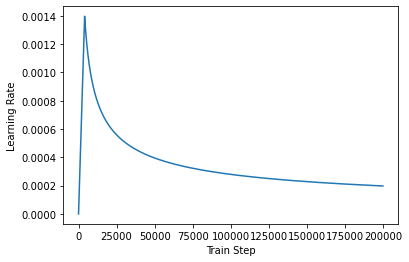

In [34]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### 4. 모델 컴파일
-----------------------------------------------------------------------------------------------------------
손실함수와 커스텀 학습률로 모델 컴파일.

In [35]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


### 5. 훈련하기
----------------------------------------------------------------------------------------------------------
20 에포크 훈련

In [36]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
689/689 [==============================] - 50s 72ms/step - loss: 2.1102 - accuracy: 0.0427
Epoch 2/20
689/689 [==============================] - 49s 71ms/step - loss: 1.4988 - accuracy: 0.0791
Epoch 3/20
689/689 [==============================] - 49s 71ms/step - loss: 1.3930 - accuracy: 0.0862
Epoch 4/20
689/689 [==============================] - 49s 71ms/step - loss: 1.3337 - accuracy: 0.0905
Epoch 5/20
689/689 [==============================] - 49s 71ms/step - loss: 1.2826 - accuracy: 0.0946
Epoch 6/20
689/689 [==============================] - 49s 71ms/step - loss: 1.2361 - accuracy: 0.0982
Epoch 7/20
689/689 [==============================] - 49s 71ms/step - loss: 1.1815 - accuracy: 0.1022
Epoch 8/20
689/689 [==============================] - 49s 71ms/step - loss: 1.1199 - accuracy: 0.1075
Epoch 9/20
689/689 [==============================] - 49s 71ms/step - loss: 1.0622 - accuracy: 0.1133
Epoch 10/20
689/689 [==============================] - 49s 71ms/step - loss: 1.008

## 15-13. 챗봇 테스트하기
예측 단계는 다음과 같다.
  1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.
  2. 입력 문장을 토크나이징하고, START_TOKEN과 END_TOKEN을 추가한다.
  3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.
  4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.
  5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.
  6. END_TOKEN이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.

In [37]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [38]:
#입력문장에 대해서 decoder_inference를 호출해 챗봇대답얻는 함수
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


In [39]:
sentence_generation('Where have you been?')

입력 : Where have you been?
출력 : i m not gonna let her away from you .


'i m not gonna let her away from you .'

In [40]:
sentence_generation("It's a trap")

입력 : It's a trap
출력 : it s not mine .


'it s not mine .'

## 15-14.프로젝트: 한국어 데이터로 챗봇 만들기
### Step 1. 데이터 수집하기
-----------------------------------------------------------------------------------------------------------
```
wget으로 데이터 다운로드
$ wget https://github.com/songys/Chatbot_data/raw/master/ChatbotData%20.csv ```
  








### Step 2. 데이터 전처리하기
-----------------------------------------------------------------------------------------------------------
다른 언어이기에 다른 전처리를 수행해야 할 필요도 있다.

In [76]:
def preprocess_sentence(sentence):

  sentence = re.sub(r"[?.!,]+", "", sentence)

  return sentence
print("슝=3")

슝=3


In [77]:
with open('ChatbotData.txt', 'r') as file:
    lines = file.readlines()
    lines = lines[1:]
input=[]
output=[]
for line in lines:
  line=line[:-3].split(',')
  input.append(preprocess_sentence(line[0]))
  output.append(preprocess_sentence(line[1]))
print(input)

    

['12시 땡', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨', 'SNS보면 나만 빼고 다 행복해보여', '가끔 궁금해', '가끔 뭐하는지 궁금해', '가끔은 혼자인게 좋다', '가난한 자의 설움', '가만 있어도 땀난다', '가상화폐 쫄딱 망함', '가스불 켜고 나갔어', '가스불 켜놓고 나온거 같아', '가스비 너무 많이 나왔다', '가스비 비싼데 감기 걸리겠어', '가스비 장난 아님', '가장 확실한 건 뭘까', '가족 여행 가기로 했어', '가족 여행 고고', '가족 여행 어디로 가지', '가족 있어', '가족관계 알려 줘', '가족끼리 여행간다', '가족들 보고 싶어', '가족들이랑 서먹해', '가족들이랑 서먹해졌어', '가족들이랑 어디 가지', '가족들이랑 여행 갈거야', '가족여행 가야지', '가족이 누구야', '가족이랑 여행 가려고', '가족한테 스트레스 풀었어', '가출할까', '가출해도 갈 데가 없어', '간만에 떨리니까 좋더라', '간만에 쇼핑 중', '간만에 휴식 중', '간식 뭐 먹을까', '간식 추천', '간장치킨 시켜야지', '간접흡연 싫어', '갈까 말까 고민 돼', '갈까 말까', '감 말랭이 먹고 싶다', '감 말랭이 먹어야지', '감기 같애', '감기 걸린 것 같아', '감기 기운이 있어', '감기 들 거 같애', '감기가 오려나', '감기약이 없어', '감기인거 같애', '감미로운 목소리 좋아', '감정이 쓰레기통처럼 엉망진창이야', '감정컨트롤을 못하겠어', '감정컨트롤이 안돼', '감히 나를 무시하는 애가 있어', '갑자기 나쁜 생각이 막 들더라', '갑자기 눈물 나', '갑자기 물어봐서 당황했어', '갑자기 불편한 사이가 된 거 같아', '강렬한 첫인상 남겨야 하는데', '강아지 키우고 싶어', '강

In [80]:
print('전체 샘플 수 :', len(input))
print('전체 샘플 수 :', len(output))

전체 샘플 수 : 11823
전체 샘플 수 : 11823


### Step 3. SubwordTextEncoder 사용하기
-----------------------------------------------------------------------------------------------------------
한국어는 형태소 분석기를 사용해 토크나이징한다고 알고 있지만, 이 프로젝트는 그대로 사용하자.

In [82]:
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성. (Tensorflow 2.2.0 이하)
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(input + output, target_vocab_size=2**13)

# (주의) Tensorflow 2.3.0 이상의 버전에서는 아래 주석의 코드를 대신 실행해 주세요. 
#tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


In [83]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [84]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8166]
END_TOKEN의 번호 : [8167]


In [85]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8168


In [86]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(input[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(output[21])))

정수 인코딩 후의 21번째 질문 샘플: [5754, 604, 2482, 4146]
정수 인코딩 후의 21번째 답변 샘플: [2341, 7506, 5, 6263, 103]


In [87]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 20
print(MAX_LENGTH)

20


In [88]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


In [89]:
input, output = tokenize_and_filter(input, output)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(input)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(output)))

단어장의 크기 : 8168
필터링 후의 질문 샘플 개수: 11805
필터링 후의 답변 샘플 개수: 11805


In [90]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': input,
        'dec_inputs': output[:, :-1]
    },
    {
        'outputs': output[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


### Step 4. 모델 구성하기
-----------------------------------------------------------------------------------------------------------
트랜스포머 모델구현

In [91]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

	# 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


In [92]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Model)                 (None, None, 256)    3145216     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [93]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("슝=3")

슝=3


In [94]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


Text(0.5, 0, 'Train Step')

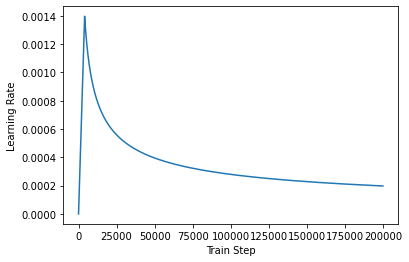

In [95]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [96]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


In [97]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 12s 66ms/step - loss: 2.5548 - accuracy: 0.0423
Epoch 2/20
185/185 [==============================] - 12s 66ms/step - loss: 2.2126 - accuracy: 0.0526
Epoch 3/20
185/185 [==============================] - 12s 64ms/step - loss: 2.0158 - accuracy: 0.0536
Epoch 4/20
185/185 [==============================] - 12s 64ms/step - loss: 1.8737 - accuracy: 0.0608
Epoch 5/20
185/185 [==============================] - 12s 65ms/step - loss: 1.7559 - accuracy: 0.0680
Epoch 6/20
185/185 [==============================] - 12s 64ms/step - loss: 1.6318 - accuracy: 0.0774
Epoch 7/20
185/185 [==============================] - 12s 64ms/step - loss: 1.4969 - accuracy: 0.0899
Epoch 8/20
185/185 [==============================] - 12s 65ms/step - loss: 1.3460 - accuracy: 0.1065
Epoch 9/20
185/185 [==============================] - 12s 65ms/step - loss: 1.1848 - accuracy: 0.1231
Epoch 10/20
185/185 [==============================] - 12s 65ms/step - loss: 1.019

### Step 5. 모델 평가하기
-----------------------------------------------------------------------------------------------------------
전처리 방법을 고려하여 입력된 문자에 대해서 대답을 얻는 예측함수 만들기

In [98]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [99]:
#입력문장에 대해서 decoder_inference를 호출해 챗봇대답얻는 함수
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


In [105]:
sentence_generation('나 오늘 헤어졌어')

입력 : 나 오늘 헤어졌어
출력 : 헛헛하시겠어요


'헛헛하시겠어요'